<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/6%20Recommender%20System/recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommender System




## 1. Collaborative Filtering Algorithm

$r(i,j) = 1 $: if user $j$ has rated movie $i$ ($0$ otherwise)

$y^{(i,j)} = $ rating by user $j$ on movie $i$ (if defined)

$\theta^{(j)} = $ parameter vector for user $j$, $ \qquad\theta^{(j)}\in \mathbb{R}^{n+1} $ 

$x^{(i)} = $feature vector for movie $i$

$\qquad eg. x_1 = romance, x_2 = action, x_3 = comedy, ..., x_n =fantasy$

### 1.1 Collaborative Filtering cost function

1. Given $x^{(1)},...,x^{(n_m)}, \textrm{ estimate  }\theta^{(1)},...,\theta^{(n_u)} \textrm{:}$

$\qquad \displaystyle\min_{\theta^{(1)},...,\theta^{(n_u)} } J = \frac{1}{2}\sum_{j=1}^{n_u}\sum_{i:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})^2 + \frac{\lambda}{2}\sum_{j=1}^{n_u}\sum_{k=1}^n(\theta_k^{(j)})^2$

2. Given $\theta^{(1)},...,\theta^{(n_u)}, \textrm{ estimate  } x^{(1)},...,x^{(n_m)}\textrm{:}$

$\qquad \displaystyle\min_{x^{(1)},...,x^{(n_m)}} J = \frac{1}{2}\sum_{i=1}^{n_m}\sum_{j:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})^2 + \frac{\lambda}{2}\sum_{i=1}^{n_m}\sum_{k=1}^n(x_k^{(i)})^2$


3. Minimizing  $x^{(1)},...,x^{(n_m)}, \textrm{ and  }\theta^{(1)},...,\theta^{(n_u)} \textrm{ simultaneously:}$
$ J(x^{(1)},...,x^{(n_m)},\theta^{(1)},...,\theta^{(n_u)}) = \displaystyle\frac{1}{2}\sum_{(i,j):r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})^2 +\frac{\lambda}{2}\sum_{j=1}^{n_u}\sum_{k=1}^n(\theta_k^{(j)})^2 +  \frac{\lambda}{2}\sum_{i=1}^{n_m}\sum_{k=1}^n(x_k^{(i)})^2$

$\qquad \displaystyle\min_{\theta^{(1)},...,\theta^{(n_u)},x^{(1)},...,x^{(n_m)} }J(x^{(1)},...,x^{(n_m)},\theta^{(1)},...,\theta^{(n_u)}) $

### 1.2 Collaborative Filtering gradient

$\qquad \displaystyle\frac{\partial J}{\partial x_k^{(i)}} = \sum_{j:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})\theta_k^{(j)}+\lambda x_k^{(i)}$

$\qquad \displaystyle\frac{\partial J}{\partial \theta_k^{(j)}} = \sum_{j:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})x_k^{(i)}+\lambda \theta_k^{(j)}$

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io 
import scipy.optimize #Use for fmincg


## 2. Movie ratings dataset

https://github.com/arturomp/coursera-machine-learning-in-python/blob/master/mlclass-ex8-004/mlclass-ex8/ex8_cofi.py

https://stevenpzchan.github.io/ml_dl_coursera_Andrew_Ng/python/machine-learning-ex8


### 2.1 Load MovieLens datase and Process the data

In [2]:
# !wget "http://files.grouplens.org/datasets/movielens/ml-100k.zip"
!wget "https://github.com/jchen8000/MachineLearning/blob/master/6%20Recommender%20System/ml-100k.zip?raw=true"
!mv ml-100k* ml-100k.zip
!unzip ml-100k.zip
!ls ml-100k/

--2019-07-25 00:10:34--  https://github.com/jchen8000/MachineLearning/blob/master/6%20Recommender%20System/ml-100k.zip?raw=true
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jchen8000/MachineLearning/raw/master/6%20Recommender%20System/ml-100k.zip [following]
--2019-07-25 00:10:34--  https://github.com/jchen8000/MachineLearning/raw/master/6%20Recommender%20System/ml-100k.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jchen8000/MachineLearning/master/6%20Recommender%20System/ml-100k.zip [following]
--2019-07-25 00:10:34--  https://raw.githubusercontent.com/jchen8000/MachineLearning/master/6%20Recommender%20System/ml-100k.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133

In [3]:
dataset = pd.read_csv("ml-100k/u.data",sep='\t',names="user_id,item_id,rating,timestamp".split(","))
dataset.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
items = pd.read_csv("ml-100k/u.item",
                    sep='|',
                    names="movie_id|movie_title|release_date|video_release_date|IMDb_URL|unknown|Action|Adventure|Animation|Children's|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western|".split("|"),
                    encoding="latin-1")
items.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,NaN


In [5]:
#Set user_id starting from 0 - number_users-1, and same for item_id
dataset.user_id = dataset.user_id.astype('category').cat.codes.values
dataset.item_id = dataset.item_id.astype('category').cat.codes.values
items.movie_id = items.movie_id.astype('category').cat.codes.values

num_users, num_movies = len(dataset.user_id.unique()), len(dataset.item_id.unique())
print("Number of Users:", num_users, "; Number of Items:", num_movies, "; Rating is from", dataset.rating.min(), "to", dataset.rating.max())

Number of Users: 943 ; Number of Items: 1682 ; Rating is from 1 to 5


In [0]:
Y = np.zeros((num_movies, num_users))

for index, row in dataset.iterrows():
     # access data using column names
     i_item = row['item_id']
     i_user = row['user_id']
     i_rating = row['rating']
     Y[i_item,i_user] = i_rating

R = (Y>=1)   
R = R.astype('float64')



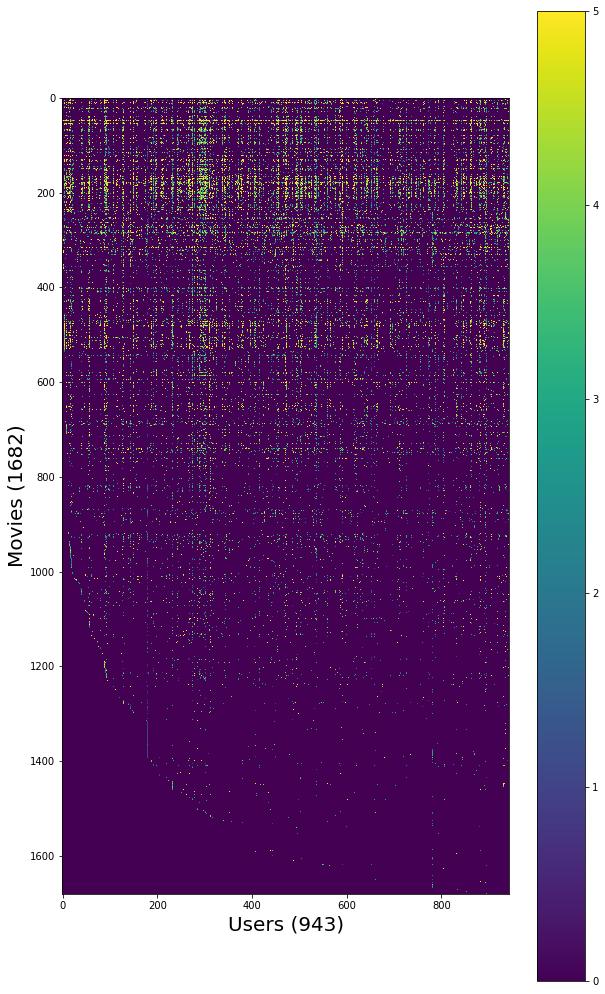

In [7]:
fig = plt.figure(figsize=(10,10*(1682./943.)))
plt.imshow(Y)
plt.colorbar()
plt.ylabel('Movies (%d)'%num_movies,fontsize=20)
plt.xlabel('Users (%d)'%num_users,fontsize=20)
plt.show()


### 2.2 Train the Collaborative Filtering Model

In [0]:
def normalizeRatings(Y, R):
    """
    Preprocess data by subtracting mean rating for every movie (every row)
    This is important because without this, a user who hasn't rated any movies
    will have a predicted score of 0 for every movie, when in reality
    they should have a predicted score of [average score of that movie].
    """

    # The mean is only counting movies that were rated
    Ymean = np.sum(Y,axis=1)/np.sum(R,axis=1)
    Ymean = Ymean.reshape((Ymean.shape[0],1))
    
    return Y-Ymean, Ymean

In [0]:
def flattenParams(X, Theta):
    """
    Hand this function an X matrix and a Theta matrix and it will flatten
    it into into one long (nm*nf + nu*nf,1) shaped numpy array
    """
    return np.concatenate((X.flatten(), Theta.flatten()))

# A utility function to re-shape the X and Theta will probably come in handy
def reshapeParams(flattened_XandTheta, nm, nu, nf):
    assert flattened_XandTheta.shape[0] == int(num_movies*num_features+num_users*num_features)
    
    reX = flattened_XandTheta[:int(nm*nf)].reshape((nm,nf))
    reTheta = flattened_XandTheta[int(nm*nf):].reshape((nu,nf))
    
    return reX, reTheta

**Cost Function:**

$\qquad  J(x^{(1)},...,x^{(n_m)},\theta^{(1)},...,\theta^{(n_u)}) = \displaystyle\frac{1}{2}\sum_{(i,j):r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})^2 +\frac{\lambda}{2}\sum_{j=1}^{n_u}\sum_{k=1}^n(\theta_k^{(j)})^2 +  \frac{\lambda}{2}\sum_{i=1}^{n_m}\sum_{k=1}^n(x_k^{(i)})^2$

**Gradient Descent**

$\qquad \displaystyle\frac{\partial J}{\partial x_k^{(i)}} = \sum_{j:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})\theta_k^{(j)}+\lambda x_k^{(i)}$

$\qquad \displaystyle\frac{\partial J}{\partial \theta_k^{(j)}} = \sum_{j:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})x_k^{(i)}+\lambda \theta_k^{(j)}$


In [0]:
def cofiCostFunc(params, Y, R, num_users, num_movies, num_features, lambda_=0):
    #COFICOSTFUNC Collaborative filtering cost function
    #   [J, grad] = COFICOSTFUNC(params, Y, R, num_users, num_movies, ...
    #   num_features, lambda) returns the cost and gradient for the
    #   collaborative filtering problem.
    #
    
    X, Theta = reshapeParams(params, num_movies, num_users, num_features)

    # These are the return values
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)
    
    
    ### COST FUNCTION, NO REGULARIZATION
    # X * Theta performed according to low rank matrix vectorization
    squared_error = np.power(np.dot(X,Theta.T) - Y,2)

    # for cost function, sum only i,j for which R(i,j)=1
    J = (1/2.) * np.sum(squared_error * R)
    J = J + (lambda_/2.)*( np.sum( np.power(Theta, 2) ) + np.sum( np.power(X, 2) ) )

    ### GRADIENTS, NO REGULARIZATION
    X_grad = np.dot(( np.dot(X, Theta.T) - Y ) * R, Theta)
    X_grad = X_grad + lambda_*X

    Theta_grad = np.dot((( np.dot(X, Theta.T) - Y ) * R).T, X)
    Theta_grad = Theta_grad + lambda_*Theta
    
    grad = flattenParams(X_grad, Theta_grad)
    
    return J, grad

In [0]:
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

Ynorm, Ymean = normalizeRatings(Y,R)

In [0]:
# Set Initial Parameters (Theta, X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)

initial_parameters  = flattenParams(X,Theta)

# Set options
maxiter = 100
options = {'disp': True, 'maxiter':maxiter}
lambda_=10

In [0]:
from scipy.optimize import minimize

# Create "short hand" for the cost function to be minimized
def costFunc(initial_parameters):
    return cofiCostFunc(initial_parameters, Y, R, num_users, num_movies, num_features, lambda_)


results = minimize(costFunc, x0=initial_parameters, options=options, method="L-BFGS-B", jac=True)


In [0]:
X, Theta = reshapeParams(results['x'], num_movies, num_users, num_features)

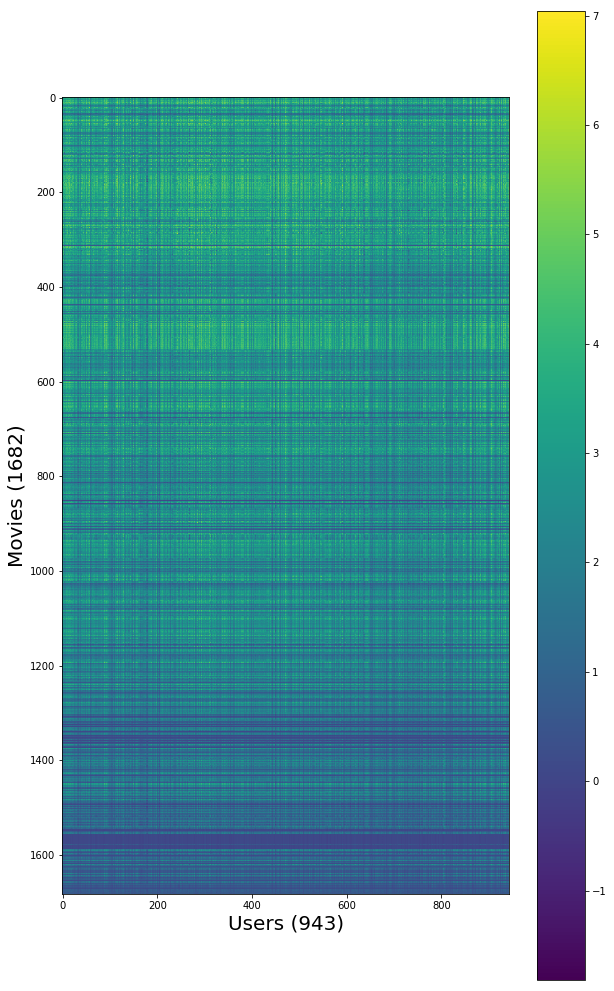

In [15]:
prediction_matrix = X.dot(Theta.T)


fig = plt.figure(figsize=(10,10*(1682./943.)))
plt.imshow(prediction_matrix)
plt.colorbar()
plt.ylabel('Movies (%d)'%num_movies,fontsize=20)
plt.xlabel('Users (%d)'%num_users,fontsize=20)
plt.show()

### 2.3 Check Collaborative Filtering Gradient and Cost Function  

In [0]:
#  Reduce the data set size so that this runs faster
num_users = 40
num_movies = 50
num_features = 10
X_chk = X[:num_movies, :num_features]
Theta_chk = Theta[:num_users, :num_features]
Y_chk = Y[:num_movies, :num_users]
R_chk = R[:num_movies, :num_users]

In [17]:
# "...run your cost function. You should expect to see an output of 22.22."
J1, _ = cofiCostFunc(flattenParams(X_chk,Theta_chk),Y_chk,R_chk,num_users,num_movies,num_features)
print( 'Cost with num_users = %d, num_movies = %d, num_features = %d is %0.2f.' % (num_users, num_movies, num_features,J1) )
    
# "...with lambda = 1.5 you should expect to see an output of 31.34."
J2, _ = cofiCostFunc(flattenParams(X_chk,Theta_chk),Y_chk,R_chk,num_users,num_movies,num_features,lambda_=1.5)
print( 'Cost with num_users = %d, num_movies = %d, num_features = %d (and lambda = 1.5) is %0.2f.' % (num_users, num_movies, num_features,J2) )

Cost with num_users = 40, num_movies = 50, num_features = 10 is 104.48.
Cost with num_users = 40, num_movies = 50, num_features = 10 (and lambda = 1.5) is 379.40.


In [0]:
def checkGradient(params, Y, R, num_users, num_movies, num_features, lambda_=0.):
    
    print( 'Numerical Gradient \t cofiGrad \t\t Difference' )
    
    # Compute a numerical gradient with an epsilon perturbation vector
    eps = 0.0001
    nparams = len(params)
    epsvec = np.zeros(nparams)
    # These are my implemented gradient solutions
    _, grads = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, lambda_)    

    # Choose 10 random elements of my combined (X, Theta) param vector
    # and compute the numerical gradient for each... print to screen
    # the numerical gradient next to the my cofiGradient to inspect
    
    for i in range(10):
        idx = np.random.randint(0,nparams)
        epsvec[idx] = eps
        loss1, _ = cofiCostFunc(params-epsvec,Y, R, num_users, num_movies, num_features, lambda_)
        loss2, _ = cofiCostFunc(params+epsvec,Y, R, num_users, num_movies, num_features, lambda_)
        grad = (loss2 - loss1) / (2*eps)
        epsvec[idx] = 0
        print( '%0.15f \t %0.15f \t %0.15f' % (grad, grads[idx], grad - grads[idx]) )

In [20]:
print( "Checking gradient with lambda = 0..." )
checkGradient(flattenParams(X_chk, Theta_chk), Y_chk, R_chk, num_users, num_movies, num_features)

print( "\nChecking gradient with lambda = 1.5..." )
checkGradient(flattenParams(X_chk, Theta_chk), Y_chk, R_chk, num_users, num_movies, num_features, lambda_ = 1.5)

Checking gradient with lambda = 0...
Numerical Gradient 	 cofiGrad 		 Difference
-1.025796774527521 	 -1.025796774484135 	 -0.000000000043386
-1.201886512873784 	 -1.201886512862274 	 -0.000000000011511
0.093589922087745 	 0.093589922132121 	 -0.000000000044377
0.000000000000000 	 0.000000000000000 	 0.000000000000000
0.447776627652274 	 0.447776627578863 	 0.000000000073411
-2.038896943830082 	 -2.038896943815524 	 -0.000000000014558
0.785737324235924 	 0.785737324183714 	 0.000000000052210
-1.299974132891180 	 -1.299974132931205 	 0.000000000040026
1.079954539662253 	 1.079954539586530 	 0.000000000075723
-1.632877991823989 	 -1.632877991737493 	 -0.000000000086496

Checking gradient with lambda = 1.5...
Numerical Gradient 	 cofiGrad 		 Difference
-1.842388743682477 	 -1.842388743736895 	 0.000000000054418
1.152232977403855 	 1.152232977607588 	 -0.000000000203732
1.643329051717046 	 1.643329051442933 	 0.000000000274114
6.540151807143957 	 6.540151807039195 	 0.000000000104762
0.244

### 2.4 Predict rating for a new user

**How Finding Related Movies**

For each product $i$, we learn a feature vector $x^{(i)} \in \mathbb{R}^{n}$

e.g. $x_1$ = romance, $x_2$ = action, $x_3$ = comedy, ..., $x_n$ =...

Small $||x^{(i)} - x^{(j)}||$ means $j$ and $i$ are ***SIMILAR***

5 most similar movies to movie $i:$

Find the 5 movies $j$ with the smallest $||x^{(i)} - x^{(j)}||$

In [0]:
new_ratings = np.zeros((Y.shape[0],1))
new_ratings[0]   = 4
new_ratings[97]  = 2
new_ratings[6]   = 3
new_ratings[11]  = 5
new_ratings[53]  = 4
new_ratings[63]  = 5
new_ratings[65]  = 3
new_ratings[68]  = 5
new_ratings[182] = 4
new_ratings[225] = 5
new_ratings[354] = 5  

In [0]:
# Add my ratings to the Y matrix, and the relevant row to the R matrix
new_R = new_ratings > 0
Y = np.hstack((Y,new_ratings))
R = np.hstack((R,new_R))

num_movies, num_users = Y.shape
num_features = 10

Ynorm, Ymean = normalizeRatings(Y,R)

In [0]:
# Set Initial Parameters (Theta, X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)

initial_parameters  = flattenParams(X,Theta)

In [0]:
results = minimize(costFunc, x0=initial_parameters, options=options, method="L-BFGS-B", jac=True)

In [0]:
X, Theta = reshapeParams(results['x'], num_movies, num_users, num_features)

In [0]:
# After training the model, now make recommendations by computing
# the predictions matrix
prediction_matrix = X.dot(Theta.T)

# Grab the last user's predictions (since I put my predictions at the
# end of the Y matrix, not the front)
# Add back in the mean movie ratings
new_predictions = prediction_matrix[:,-1] + Ymean.flatten()

In [0]:
# Sort my predictions from highest to lowest
pred_idxs_sorted = np.argsort(new_predictions)
pred_idxs_sorted[:] = pred_idxs_sorted[::-1]

In [28]:
print( "Top recommendations for you:" )
for i in range(10):
    print( 'Predicting rating %0.1f for movie #%d: %s.' % \
    (new_predictions[pred_idxs_sorted[i]], pred_idxs_sorted[i],items.loc[pred_idxs_sorted[i]].movie_title)  )
    
print( "\nThe ratings provided:" )
for i in range(len(new_ratings)):
    if new_ratings[i] > 0:
        print( 'Rated %d for movie #%d: %s.' % (new_ratings[i], i, items.loc[i].movie_title)  )    

Top recommendations for you:
Predicting rating 8.5 for movie #49: Star Wars (1977).
Predicting rating 8.4 for movie #312: Titanic (1997).
Predicting rating 8.4 for movie #63: Shawshank Redemption, The (1994).
Predicting rating 8.2 for movie #317: Schindler's List (1993).
Predicting rating 8.2 for movie #173: Raiders of the Lost Ark (1981).
Predicting rating 8.1 for movie #271: Good Will Hunting (1997).
Predicting rating 8.1 for movie #21: Braveheart (1995).
Predicting rating 8.1 for movie #11: Usual Suspects, The (1995).
Predicting rating 8.0 for movie #171: Empire Strikes Back, The (1980).
Predicting rating 8.0 for movie #126: Godfather, The (1972).

The ratings provided:
Rated 4 for movie #0: Toy Story (1995).
Rated 3 for movie #6: Twelve Monkeys (1995).
Rated 5 for movie #11: Usual Suspects, The (1995).
Rated 4 for movie #53: Outbreak (1995).
Rated 5 for movie #63: Shawshank Redemption, The (1994).
Rated 3 for movie #65: While You Were Sleeping (1995).
Rated 5 for movie #68: Forrest